In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import MongoClient

In [123]:
class DataFrame:
    def conectar(self,host, port, username, password, db):
        global conn
        if username and password:
            mongo_uri = 'mongodb://%s:%s@%s:%s/%s' % (username,password,host,port,db)
            conn = MongoClient(mongo_uri)
        else:
            conn = MongoClient(host, port)
        return conn[db]
    
    def read_mongo(self,no_id=True):
        global df
        db = conn['rios']
        test = db.rios
        df = pd.DataFrame(list(test.find()))

        if no_id:
            del df['_id']

        return df
    def grafica(self):
        if True:
            try:
                df[df.Cuenca > 60.000].groupby(['Rio','Cuenca']).size().unstack(fill_value=0).plot(kind='bar',stacked=False)
                plt.title('Donde realizar un trasvase')
                plt.show()
            except ValueError:
                print('no se ha podido crear la grafica correctamente')

In [124]:
start=DataFrame()
start.conectar('192.168.2.9','27017','alfonso','usuario','rios')

Database(MongoClient(host=['192.168.2.9:27017'], document_class=dict, tz_aware=False, connect=True), 'rios')

In [125]:
start.read_mongo()

,Caudal,Cuenca,Recorrido,Rio
0,340.0,12.486,310.000,Rio Miño
1,675.0,97.290,897.000,Rio Duero
2,444.0,80.600,1.007,Rio Tajo
3,78.0,67.633,744.000,Rio Guadiana
4,165.0,57.071,657.000,Rio Guadalquivir
5,17.0,3.010,208.000,Rio Ter
6,19.0,5.000,148.000,Rio Llobregat
7,600.0,86.100,930.000,Rio Ebro
8,15.0,4.028,156.000,Rio Mijares
9,14.0,6.394,280.000,Rio Turia


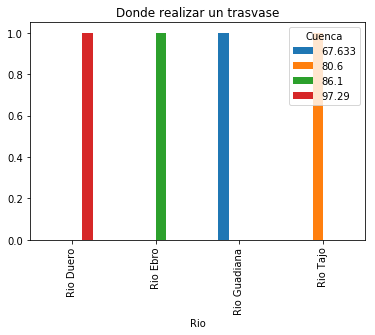

In [126]:
start.grafica() 